In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [2]:
df=sns.load_dataset('iris')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
#making Binary Classification

df=df[df['species']!='setosa']

In [6]:
df['species']=df['species'].map({'virginica':0,'versicolor':1})

In [7]:
X=df.drop('species',axis=1)
y=df['species']

In [8]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
log_reg=LogisticRegression()

In [11]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [12]:
parameter={'penalty':['l1', 'l2', 'elasticnet', None],'C':[i for i in range(0,15)],'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

In [13]:
model=GridSearchCV(log_reg,param_grid=parameter,cv=5,scoring='accuracy',verbose=1)

In [14]:
model.fit(X_train,y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                               14],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy', verbose=1)

In [15]:
model.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'saga'}

In [16]:
model.best_score_

0.975

In [17]:
model.best_estimator_

LogisticRegression(C=1, penalty='l1', solver='saga')

In [18]:
model.best_index_

29

In [19]:
model.cv_results_

{'mean_fit_time': array([0.00049181, 0.00041742, 0.00030017, 0.00029917, 0.00029583,
        0.00056596, 0.00048327, 0.0003325 , 0.00032363, 0.00039716,
        0.00051684, 0.00039492, 0.00030894, 0.00039392, 0.00048575,
        0.00034642, 0.00031285, 0.00037918, 0.00035448, 0.00029182,
        0.0003787 , 0.00034666, 0.00045404, 0.00049543, 0.00054827,
        0.00322094, 0.00048733, 0.00042849, 0.0004282 , 0.00227518,
        0.00379252, 0.00142207, 0.00513124, 0.00328517, 0.00282664,
        0.00278111, 0.0004374 , 0.00042634, 0.00044913, 0.00062437,
        0.00042977, 0.00153737, 0.00459738, 0.00146356, 0.01110415,
        0.00367408, 0.00220914, 0.00208621, 0.00052629, 0.00369167,
        0.00043812, 0.00046616, 0.0004766 , 0.00211306, 0.00389042,
        0.00153637, 0.00507479, 0.00248847, 0.00195222, 0.00207858,
        0.00044589, 0.00047989, 0.00042663, 0.00042715, 0.00043774,
        0.00150685, 0.0044198 , 0.00137839, 0.00964994, 0.00387282,
        0.00202985, 0.00204387,

In [20]:
pred=model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,precision_recall_curve,fbeta_score

print(f'accuracy of the model with prediction is {accuracy_score(y_test,pred)}')

print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

accuracy of the model with prediction is 0.95
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.88      0.93         8

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20

[[12  0]
 [ 1  7]]


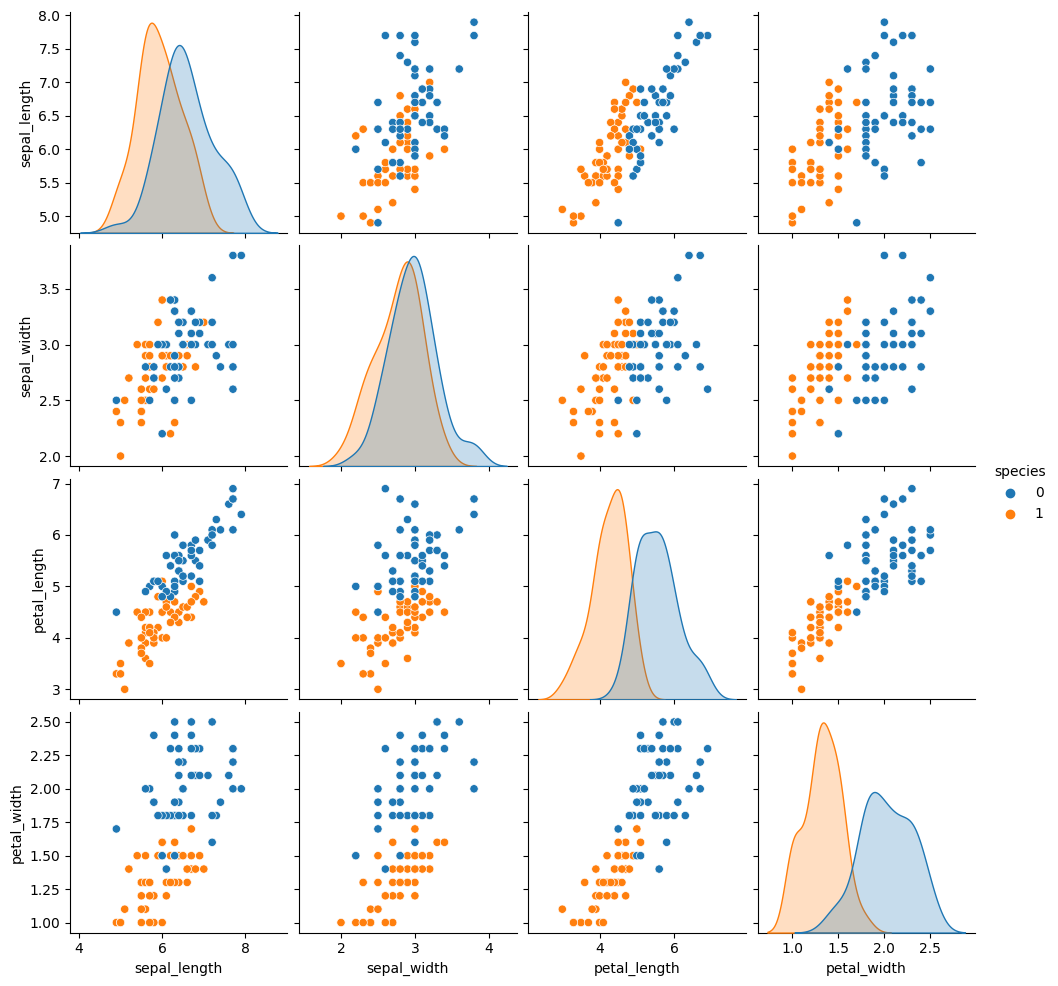

In [22]:
sns.pairplot(df,hue='species')